In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Problem 1.3 

In [2]:
## Problem 1.3 #activation functions
tf.nn.sigmoid
tf.nn.relu
tf.tensordot

def nn_layer(x, w, b, f):
    '''
    transformation for a single layer of a neural net

    x: array on inputs, shape: (batch size, input dim)
    w: array of weights, shape: (input dim, output dim)
    b: array of biases, shape: (output dim)
    f: activation function
'''
    return f(tf.tensordot(x, w, axes = 1) + b)

def nn_2layers(x, params, f_hidden, f_out):
    h = nn_layer(x, params[0], params[1], f_hidden)
    y_hat = nn_layer(h, params[2], params[3], f_out)
    return y_hat

## Problem 1.4

In [3]:
###Problem 1.4 ## Problem 1.4
w1 = tf.constant([[1, -1, 0, 1],[0, 0, 0.5, 1]], dtype = tf.float32)
b1 = tf.constant([0, 0, 1, 0], dtype = tf.float32)
w2 = tf.constant([1, 0, -1, 1], dtype = tf.float32)
b2 = tf.constant([1], dtype = tf.float32)
x = tf.constant([[1, -1],[0, -1],[0, 1]], dtype = tf.float32)
yhat = nn_2layers(x, [w1, b1, w2, b2], tf.nn.relu, tf.nn.sigmoid)
print(yhat)

tf.Tensor([0.81757444 0.6224593  0.6224593 ], shape=(3,), dtype=float32)


The class probabilities associated with the forward pass of each sample are 0.8176, 0.6225, 0.6225 

## Problem 2.2

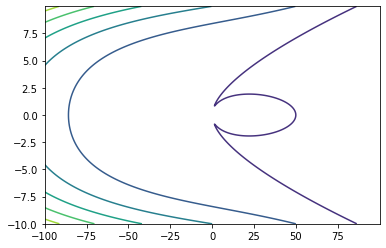

In [4]:
delta = 0.01
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z) 

## Problem 2.3

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        starting_point = np.random.uniform(-5,5,2)
    
    traj = np.zeros((iterations+1,2))
    
    traj[0,:] = starting_point
    for i in range(iterations):
        traj[i+1,:] = traj[i,:] - learning_rate*grad_f(traj[i,:])
    return traj

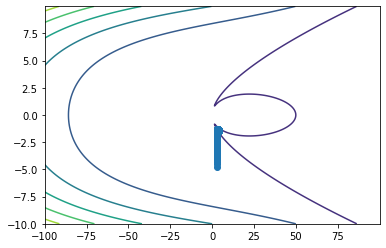

In [7]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=3e-6)
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

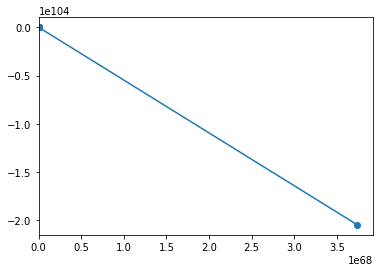

In [8]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=1e-4)
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Problem 2.4

In [9]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):

    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10, 10, size = 2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

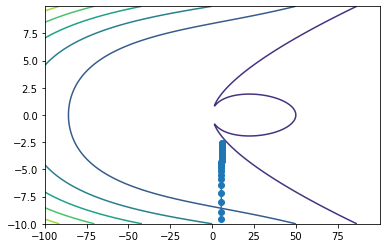

In [10]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=1e-6, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

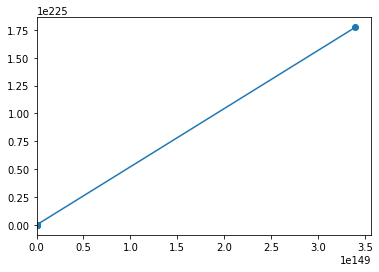

In [11]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=1e-3, alpha=.8)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

This function does not have minimum and it does not converge to 0 

## Problem 3.2

In [29]:
#Prepare these functions to establish the gradient loss function 
def loss(y, y_hat):
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def params(param_vector):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vector
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

#Input Values 
W = np.array([[1,-1,0,1],
              [0,0,.5,1]])
b = np.array([0,0,1,0])
V = np.array([[1,0,-1,1]]).T
c = np.array([1])

X = np.array([[1,-1],
              [0,-1],
              [0,1]])
Y = np.array([[1,1,1]]).T

In [30]:
def grad_f(param_vector, x, y):
    
    W, b, v, c = params(param_vector)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(residuals(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])
    dL_dw21 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14,
                     dL_dw21, dL_dw22, dL_dw23, dL_dw24,
                     dL_db1, dL_db2, dL_db3, dL_db4,
                     dL_dv1, dL_dv2, dL_dv3, dL_dv4,
                     dL_dc])

## Problem 3.3

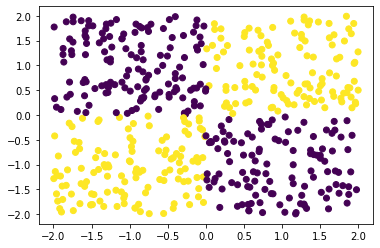

In [31]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0],x[:,1],c=y)

## Problem 3.4

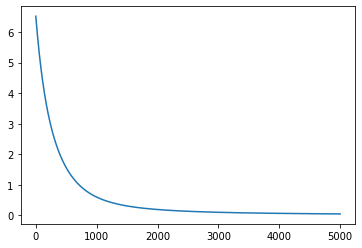

In [32]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *params(point))))
    return (np.array(trajectory), losses)
traj, losses = grad_descent(X, Y, iterations=5000,learning_rate=1e-2)
plt.plot(losses)

## Problem 3.5

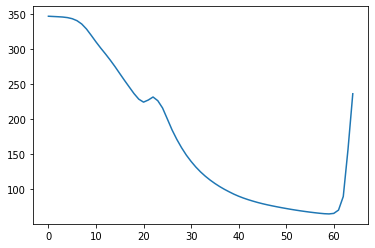

In [33]:
def grad_descent_momentum(x, y, iterations=5550, epsilon=10, alpha=.9):
    point = np.random.uniform(-.1,.1,size=17).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *params(point)))]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v - epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *params(point))))
    return (np.array(trajectory), losses)
traj, losses = grad_descent_momentum(x, y, iterations=5000, epsilon=2, alpha=.5)
plt.plot(losses)

From the two plots, it is found that the gradient descent using momentum converges much faster than the gradient descent in the algorithms 

## Problem 3.6

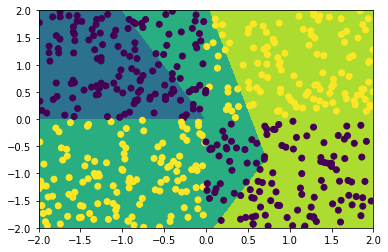

In [34]:
x_grid = np.linspace(-2, 2, 100)
mesh = np.meshgrid(x_grid, x_grid)
X1, X2 = mesh
y_hat = yhat(np.array((X1.ravel(),X2.ravel())).T, *param_vector).reshape((100,100))

fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, y_hat, levels=[0, .25, .5, .75, 1.0])
plt.scatter(x[:,0],x[:,1],c=y)
